In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/gdrive/My\ Drive/overall-state.csv.gz
!gunzip /content/gdrive/My\ Drive/overall-county.csv.gz

gzip: /content/gdrive/My Drive/overall-state.csv.gz: No such file or directory
gzip: /content/gdrive/My Drive/overall-county.csv.gz: No such file or directory


In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import glob

In [ ]:
!ls 

drive  sample_data


In [ ]:
# Load county data
county_data = pd.DataFrame()

# Insert relevant path here
county_csv = 'drive/My Drive/overall-county.csv'
#county_csv = '/content/gdrive/My Drive/overall-county.csv'
county_data = pd.read_csv(county_csv, low_memory=False)

In [ ]:
# Load states data
state_data = pd.DataFrame()

# Insert relevant path here
state_csv = 'drive/My Drive/overall-state.csv'
#state_csv = '/content/gdrive/My Drive/overall-state.csv'
state_data = pd.read_csv(state_csv, low_memory=False)

In [ ]:
county_data.head()

,date,state_code,fips,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,2020-04-06,ak,2020,female,overall,109,75073.504981,0.9259,0.9259,1.8519,0.9174,NaN,0.9174,11.0092,19.2661,5.5046,3.6697,NaN,NaN,0.9259,17.5926,3.7037,1.8519,16.6667,16.6667,13.8889,11.1111,10.1852,6.4815,2.7778,8.3333,0.9259,8.3333,56.4815,29.3578,0.0000,6.3830,0.0000,10.6383,82.9787,...,3.1930,0.0,0.0,0.7067,19.2838,2.8665,1.7429,15.2487,14.3957,13.9713,11.7750,10.5514,6.6430,2.7326,7.9930,0.8128,6.7769,55.1274,31.2456,0.0000,2.6366,0.0000,3.5836,38.0151,34.2587,77.0282,6.1406,2.6366,0.2527,0.0000,3.9007,1.6861,3.8359,15.7785,24.7842,1.6861,0.0000,12.6401,58.6343,18.7392
1,2020-04-06,al,1003,female,overall,56,79915.492427,0.0000,0.0000,3.5714,1.7857,NaN,1.7857,17.8571,33.9286,12.5000,5.3571,NaN,NaN,0.0000,25.0000,7.1429,1.7857,28.5714,25.0000,25.0000,16.0714,16.0714,3.5714,7.1429,7.1429,3.5714,3.5714,48.2143,42.8571,0.0000,3.4483,0.0000,3.4483,93.1034,...,4.0141,0.0,0.0,0.0000,26.8109,6.6555,0.6677,28.8973,24.0233,25.8905,19.0443,21.3638,2.2353,6.5056,7.4177,5.4405,3.4050,45.1407,46.2900,0.0000,0.6677,0.0000,2.0374,52.1542,22.6014,81.2749,2.2772,7.9229,0.6352,2.0374,6.2391,3.0230,8.1429,40.3764,24.2450,22.0205,1.6545,4.7447,35.6230,30.2314
2,2020-04-06,al,1073,female,overall,148,179127.587668,0.6897,0.6897,1.3793,0.6757,NaN,0.6757,11.4865,25.6757,8.1081,4.7297,NaN,NaN,1.3793,21.3793,6.8966,2.7586,20.0000,21.3793,20.6897,11.7241,11.0345,1.3793,4.1379,13.7931,0.6897,4.8276,44.8276,35.1351,0.0000,1.2500,2.5000,6.2500,90.0000,...,4.4037,0.0,0.0,1.4710,19.1040,4.9657,2.7172,20.0277,22.2108,22.7107,9.7628,9.2354,0.7340,4.7848,12.3999,1.1253,4.8785,45.0818,36.6349,0.0000,1.8716,1.4710,3.9739,45.5818,33.5308,81.7108,7.4847,3.5486,0.3662,0.7486,13.3938,4.6802,6.1521,33.8412,9.4936,5.8916,2.9165,14.1185,38.3875,20.7544
3,2020-04-06,al,1073,male,overall,55,139948.219877,3.7736,3.7736,3.7736,7.2727,NaN,7.2727,12.7273,20.0000,7.4074,5.4545,NaN,NaN,3.773

In [ ]:
state_data.head()

,date,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,2020-04-06,ak,female,18-34,119,78755.310877,0.8772,0.8772,2.6316,0.8403,NaN,1.6807,10.0840,25.2101,7.5630,5.8824,NaN,NaN,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,2020-04-06,ak,female,35-54,95,63666.933392,3.2258,3.2258,3.2258,3.1579,NaN,3.1579,14.7368,21.0526,7.3684,4.2105,NaN,NaN,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,2020-04-06,ak,female,55+,51,52710.069695,0.0000,0.0000,1.9608,0.0000,NaN,0.0000,3.9216,21.5686,7.8431,1.9608,NaN,NaN,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,2020-04-06,al,female,18-34,478,480481.152573,0.8547,1.0684,2.1368,1.6771,NaN,2.3061,18.2008,28.8703,9.4538,5.0314,NaN,Na

In [ ]:
state_data.info()
state_data=state_data.drop(['date'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83404 entries, 0 to 83403
Columns: 104 entries, date to pct_multiple_medical_conditions_weighted
dtypes: float64(99), int64(1), object(4)
memory usage: 66.2+ MB


In [ ]:
state_data.isna().sum()

state_code                                  0
gender                                      0
age_bucket                                  0
n                                           0
weight_sums                                 0
                                           ..
pct_chronic_lung_disease_weighted           0
pct_kidney_disease_weighted                 0
pct_autoimmune_disorder_weighted            0
pct_no_above_medical_conditions_weighted    0
pct_multiple_medical_conditions_weighted    0
Length: 103, dtype: int64

In [ ]:

#state_data=state_data.drop(['date'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()

l1.fit(state_data['gender'])
#l1.fit(state_data['state_code'])
#l1.fit(state_data['age_bucket'])

state_data.gender= l1.transform(state_data.gender)

state_data.head()
#female=0, male=1

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,ak,0,18-34,119,78755.310877,0.8772,0.8772,2.6316,0.8403,NaN,1.6807,10.0840,25.2101,7.5630,5.8824,NaN,NaN,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,77.3109,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,ak,0,35-54,95,63666.933392,3.2258,3.2258,3.2258,3.1579,NaN,3.1579,14.7368,21.0526,7.3684,4.2105,NaN,NaN,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,82.1053,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,ak,0,55+,51,52710.069695,0.0000,0.0000,1.9608,0.0000,NaN,0.0000,3.9216,21.5686,7.8431,1.9608,NaN,NaN,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,88.2353,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,al,0,18-34,478,480481.152573,0.8547,1.0684,2.1368,1.6771,NaN,2.3061,18.2008,28.8703,9.4538,5.0314,NaN,NaN,1.0684,2

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# l1 = LabelEncoder()

#l1.fit(state_data['gender'])
#l1.fit(state_data['state_code'])
l1.fit(state_data['age_bucket'])
#l1.transform(state_data.age_bucket)
state_data.age_bucket= l1.transform(state_data.age_bucket)
state_data.head()

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,ak,0,0,119,78755.310877,0.8772,0.8772,2.6316,0.8403,NaN,1.6807,10.0840,25.2101,7.5630,5.8824,NaN,NaN,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,77.3109,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,ak,0,1,95,63666.933392,3.2258,3.2258,3.2258,3.1579,NaN,3.1579,14.7368,21.0526,7.3684,4.2105,NaN,NaN,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,82.1053,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,ak,0,2,51,52710.069695,0.0000,0.0000,1.9608,0.0000,NaN,0.0000,3.9216,21.5686,7.8431,1.9608,NaN,NaN,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,88.2353,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,al,0,0,478,480481.152573,0.8547,1.0684,2.1368,1.6771,NaN,2.3061,18.2008,28.8703,9.4538,5.0314,NaN,NaN,1.0684,24.5726,6.8376,

In [ ]:
#l1.fit(state_data['gender'])
l1.fit(state_data['state_code'])
#l1.fit(state_data['age_bucket'])
#l1.transform(state_data.state_code)
state_data.state_code= l1.transform(state_data.state_code)
state_data.head()

#array([ 7,  7,  7, ..., 55, 56, 57])

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,7,0,0,119,78755.310877,0.8772,0.8772,2.6316,0.8403,NaN,1.6807,10.0840,25.2101,7.5630,5.8824,NaN,NaN,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,77.3109,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,7,0,1,95,63666.933392,3.2258,3.2258,3.2258,3.1579,NaN,3.1579,14.7368,21.0526,7.3684,4.2105,NaN,NaN,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,82.1053,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,7,0,2,51,52710.069695,0.0000,0.0000,1.9608,0.0000,NaN,0.0000,3.9216,21.5686,7.8431,1.9608,NaN,NaN,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,88.2353,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,8,0,0,478,480481.152573,0.8547,1.0684,2.1368,1.6771,NaN,2.3061,18.2008,28.8703,9.4538,5.0314,NaN,NaN,1.0684,24.5726,6.8376,2.99

In [ ]:
state_data_dropped = state_data.dropna()#na values dropped
state_data_dropped.head()

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
2350,8,0,0,145,462802.973425,0.0000,0.0000,2.0979,0.6897,30.4348,0.6897,13.7931,28.9655,7.5862,6.2069,0.2246,26.1159,0.0000,20.2797,6.9930,2.7972,21.6783,23.7762,18.8811,12.5874,11.8881,2.7972,5.5944,11.8881,2.0979,2.7972,48.2517,37.2414,1.3514,1.3514,1.3514,4.0541,91.8919,40.0000,75.1724,...,5.9893,0.2042,19.6547,0.0000,20.8051,6.2287,2.1679,20.9275,20.5140,18.6713,11.7630,11.8112,2.0030,4.5670,11.4994,1.3776,4.0935,47.7043,36.8184,0.5417,0.5586,0.8302,2.0494,46.6206,41.3065,75.5190,5.5642,6.4684,0.7446,1.8876,3.9268,0.3763,2.2387,9.1461,14.0375,0.0000,0.0000,3.1909,70.0717,2.2785
2351,8,0,1,194,583249.802288,2.0942,2.0942,4.1885,3.1579,22.7513,4.7368,9.3750,18.5567,6.2827,3.6842,190.5397,1.5661,3.1414,15.1832,5.7592,3.1414,17.8010,19.3717,14.6597,13.6126,7.3298,2.0942,6.2827,8.9005,3.1414,2.6178,61.2565,29.3814,0.0000,2.7027,1.3514,10.8108,85.1351,46.9072,71.1340,...,3.6074,243.1850,1.4147,3.3699,14.6460,5.4355,3.2747,16.2160,17.8710,13.6654,14.0172,7.0918,2.2939,5.9966,8.5825,3.0300,1.9825,62.1165,27.8368,0.0000,1.3754,0.4220,4.1728,30.6084,47.1693,70.7031,8.7415,3.9712,0.4869,2.4750,10.2654,1.4028,3.8820,30.0390,14.9271,5.7298,0.0000,10.6853,49.2702,17.9230
2352,8,0,2,163,645561.896600,1.2500,1.2500,3.1250,0.6173,13.2075,1.2346,4.9689,19.6319,7.4534,3.1056,0.1242,0.4277,1.2500,15.0000,7.5000,3.1250,15.0000,16.2500,18.1250,16.2500,5.0000,1.8750,3.7500,9.3750,3.1250,4.3750,61.2500,28.8344,1.6393,1.6393,0.0000,3.2787,93.4426,19.6319,85.2761,...,2.6305,0.1186,0.3646,1.6240,13.8949,7.0713,2.9406,14.8100,16.0242,17.7509,16.6295,5.5636,1.8443,3.9075,8.7967,3.7496,4.3249,59.4180,28.3466,0.7340,0.4965,0.0000,1.0683,35.3323,19.2710,84.8110,1.6625,2.9751,0.1173,1.8928,21.7870,10.0665,8.4887,59.0565,15.1619,10.5929,4.0285,12.0755,21.7587,40.0636
2353,8,1,1,72,413211.077594,0.0000,0.0000,0.0000,0.0000,15

In [ ]:
print (max(state_data_dropped['pct_tested_and_positive']))
print (min(state_data_dropped['pct_tested_and_positive']))
print (state_data_dropped.shape)# we are not lossing much , we are loosing around 10% of the data

50.0
0.0
(76790, 103)


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
state_data_mean= imp.fit_transform(state_data)
state_data_mean = pd.DataFrame(state_data_mean, columns=state_data.columns)
state_data_mean.head()

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,7.0,0.0,0.0,119.0,78755.310877,0.8772,0.8772,2.6316,0.8403,15.172148,1.6807,10.0840,25.2101,7.5630,5.8824,2.138241e+30,3.838145e+133,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,77.3109,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,7.0,0.0,1.0,95.0,63666.933392,3.2258,3.2258,3.2258,3.1579,15.172148,3.1579,14.7368,21.0526,7.3684,4.2105,2.138241e+30,3.838145e+133,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,82.1053,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,7.0,0.0,2.0,51.0,52710.069695,0.0000,0.0000,1.9608,0.0000,15.172148,0.0000,3.9216,21.5686,7.8431,1.9608,2.138241e+30,3.838145e+133,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,88.2353,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,8.0,0.0,0.0,478.0,480481.152

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
state_data_mode= imp.fit_transform(state_data)
state_data_mode = pd.DataFrame(state_data_mode, columns=state_data.columns)
state_data_mode.head()

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,7.0,0.0,0.0,119.0,78755.310877,0.8772,0.8772,2.6316,0.8403,14.2857,1.6807,10.0840,25.2101,7.5630,5.8824,0.1429,0.5,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,77.3109,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,7.0,0.0,1.0,95.0,63666.933392,3.2258,3.2258,3.2258,3.1579,14.2857,3.1579,14.7368,21.0526,7.3684,4.2105,0.1429,0.5,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,82.1053,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,7.0,0.0,2.0,51.0,52710.069695,0.0000,0.0000,1.9608,0.0000,14.2857,0.0000,3.9216,21.5686,7.8431,1.9608,0.1429,0.5,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,88.2353,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,8.0,0.0,0.0,478.0,480481.152573,0.8547,1.0684,2.1368,1.6771,14.2857,2.3061,18.2008

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
state_data_median= imp.fit_transform(state_data)
state_data_median = pd.DataFrame(state_data_median, columns=state_data.columns)
state_data_median.head()

,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,7.0,0.0,0.0,119.0,78755.310877,0.8772,0.8772,2.6316,0.8403,13.9394,1.6807,10.0840,25.2101,7.5630,5.8824,0.1542,0.9197,0.8772,21.0526,7.8947,5.2632,24.5614,23.6842,25.4386,17.5439,10.5263,6.1404,3.5088,8.7719,1.7544,5.2632,45.6140,36.1345,0.0000,8.0645,1.6129,6.4516,83.8710,41.1765,77.3109,...,5.7043,0.0,0.0,0.6736,23.3022,7.7638,5.0967,26.1142,23.4845,27.9131,18.2524,10.6775,5.5208,2.6801,8.5647,1.9383,5.4658,40.6652,41.9760,0.0000,4.6233,0.9214,2.4356,48.8476,40.8441,74.5504,10.4550,6.3869,0.7958,0.0000,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,7.0,0.0,1.0,95.0,63666.933392,3.2258,3.2258,3.2258,3.1579,13.9394,3.1579,14.7368,21.0526,7.3684,4.2105,0.1542,0.9197,3.2258,18.2796,4.3011,3.2258,19.3548,9.6774,17.2043,9.6774,11.8280,4.3011,3.2258,5.3763,0.0000,10.7527,53.7634,30.5263,0.0000,0.0000,0.0000,4.6512,95.3488,29.4737,82.1053,...,5.2698,0.0,0.0,4.0793,19.8077,5.8325,3.3564,18.1476,10.1597,16.2840,10.5732,14.0980,5.5914,3.1735,5.2914,0.0000,9.8190,54.8124,29.6202,0.0000,0.0000,0.0000,2.5222,40.7606,30.1121,81.7592,5.1141,1.4847,0.1233,0.0000,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,7.0,0.0,2.0,51.0,52710.069695,0.0000,0.0000,1.9608,0.0000,13.9394,0.0000,3.9216,21.5686,7.8431,1.9608,0.1542,0.9197,0.0000,17.6471,7.8431,0.0000,11.7647,15.6863,13.7255,9.8039,3.9216,5.8824,1.9608,7.8431,1.9608,9.8039,56.8627,25.4902,0.0000,4.5455,0.0000,9.0909,86.3636,24.0000,88.2353,...,1.1577,0.0,0.0,0.0000,15.2620,7.4176,0.0000,10.6149,15.1401,17.2272,11.4370,3.3577,4.3787,1.1577,6.1265,1.1577,12.8193,52.2573,25.9567,0.0000,1.3725,0.0000,3.0342,43.3359,19.1636,90.0037,0.2934,1.0323,0.0000,0.0000,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,8.0,0.0,0.0,478.0,480481.152573,0.8547,1.0684,2.1368,1.6771,13.9394,2.306

In [ ]:
mergedf1=state_data_dropped['state_code']
mergedf2=state_data_dropped['gender']
mergedf3=state_data_dropped['age_bucket']
mergedf1.shape

(76790,)

In [ ]:
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
state_data_droppedCat=state_data_dropped.drop(['state_code','gender','age_bucket'],axis=1) #with categorical variables
#state_data_droppedCat.shape
state_data_dropped_scaled = scaler.fit_transform(state_data_droppedCat)
state_data_dropped_scaled = pd.DataFrame(state_data_dropped_scaled, columns=state_data_droppedCat.columns)
# # state_data_dropped_scaled.merge(state_data_dropped)
state_data_dropped_scaled.head()
#state_data_dropped_scaled=pd.concat([state_data_dropped_scaled,mergedf1], axis=1)
# state_data_dropped_scaled.head()
state_data_dropped_scaled


,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_tested_and_positive,pct_tested_and_negative,pct_tested_no_result,pct_could_not_get_tested,pct_did_not_try_to_get_tested,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,...,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted,pct_tested_and_negative_weighted,pct_tested_no_result_weighted,pct_could_not_get_tested_weighted,pct_did_not_try_to_get_tested_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,0.013053,0.016199,0.000000,0.000000,0.175461,0.079315,0.534914,0.070350,0.482759,0.673251,0.297612,0.366206,2.672740e-36,1.741931e-137,0.000000,0.638435,0.419579,0.231767,0.489769,0.570628,0.528671,0.377622,0.457235,0.223776,0.329449,0.534965,0.186480,0.183372,0.334972,0.653113,0.027028,0.013514,0.040542,0.121623,0.918919,0.362500,0.716810,1.070113e-67,1.105042e-67,1.025677e-103,...,0.264216,1.565465e-36,1.648134e-137,0.000000,0.593999,0.256420,0.101938,0.431753,0.482105,0.494516,0.344921,0.430585,0.120891,0.197044,0.406827,0.064812,0.252952,0.337982,0.635307,0.054208,0.025295,0.070248,0.080942,0.655019,0.439324,0.770966,1.588014e-67,1.789305e-67,9.909855e-104,0.073080,0.084631,0.013062,0.059806,0.115071,0.315907,0.000000,0.000000,0.104553,0.750925,0.034961
1,0.019786,0.020952,0.308147,0.282717,0.350312,0.363157,0.399871,0.483155,0.328125,0.431317,0.246475,0.217367,2.267422e-33,1.044589e-138,0.376970,0.477990,0.345551,0.260287,0.402171,0.464920,0.410471,0.408378,0.281915,0.167536,0.369982,0.400523,0.279236,0.171612,0.540762,0.507764,0.000000,0.027027,0.040542,0.324324,0.851351,0.435889,0.670747,2.178275e-67,9.745476e-68,9.346157e-104,...,0.159139,1.864337e-33,1.186289e-138,0.264418,0.418152,0.223766,0.153981,0.334551,0.419991,0.361933,0.411019,0.258536,0.138448,0.258724,0.303632,0.142552,0.122506,0.565547,0.475305,0.000000,0.062282,0.035708,0.164806,0.430048,0.501777,0.721759,2.504295e-67,1.069154e-67,6.480135e-104,0.095821,0.221240,0.048694,0.103706,0.377935,0.335927,0.207365,0.000000,0.350115,0.504410,0.275009
2,0.015526,0.023412,0.183929,0.168750,0.261364,0.070989,0.232132,0.125929,0.173912,0.456309,0.292403,0.183230,1.477980e-36,2.852759e-139,0.150001,0.472222,0.449999,0.258928,0.338889,0.390000,0.507

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error,median_absolute_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [ ]:
y= state_data_dropped_scaled['pct_tested_and_positive']
output_like_variables=['pct_tested_and_positive','pct_tested_and_negative', 'pct_tested_no_result', 'pct_could_not_get_tested', 'pct_did_not_try_to_get_tested',\
                       'pct_tested_and_positive_weighted','pct_contact_covid_positive', 'pct_contact_covid_positive_weighted' ,'pct_cmnty_cli' , 'pct_cmnty_cli_weighted',\
                       'pct_tested_and_negative_weighted',	'pct_tested_no_result_weighted',	'pct_could_not_get_tested_weighted',	'pct_did_not_try_to_get_tested_weighted'] 
                        
X=state_data_dropped_scaled.drop(output_like_variables,axis=1)
X.head()


,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_diabetes,pct_cancer,pct_heart_disease,pct_high_blood_pressure,pct_asthma,pct_chronic_lung_disease,...,pct_cli_anosmia_ageusia_weighted,pct_hh_cli_weighted,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,0.013053,0.016199,0.000000,0.000000,0.175461,0.079315,0.070350,0.482759,0.673251,0.297612,0.366206,2.672740e-36,1.741931e-137,0.000000,0.638435,0.419579,0.231767,0.489769,0.570628,0.528671,0.377622,0.457235,0.223776,0.329449,0.534965,0.186480,0.183372,0.334972,0.653113,0.362500,0.716810,1.070113e-67,1.105042e-67,1.025677e-103,0.089844,0.026314,0.054687,0.113372,0.350116,0.000000,...,0.064812,0.036217,0.036217,0.438371,0.660763,0.234115,0.264216,1.565465e-36,1.648134e-137,0.000000,0.593999,0.256420,0.101938,0.431753,0.482105,0.494516,0.344921,0.430585,0.120891,0.197044,0.406827,0.064812,0.252952,0.337982,0.635307,0.439324,0.770966,1.588014e-67,1.789305e-67,9.909855e-104,0.084631,0.013062,0.059806,0.115071,0.315907,0.000000,0.000000,0.104553,0.750925,0.034961
1,0.019786,0.020952,0.308147,0.282717,0.350312,0.363157,0.483155,0.328125,0.431317,0.246475,0.217367,2.267422e-33,1.044589e-138,0.376970,0.477990,0.345551,0.260287,0.402171,0.464920,0.410471,0.408378,0.281915,0.167536,0.369982,0.400523,0.279236,0.171612,0.540762,0.507764,0.435889,0.670747,2.178275e-67,9.745476e-68,9.346157e-104,0.216766,0.060150,0.097222,0.352159,0.363756,0.177778,...,0.196308,0.222550,0.341577,0.303130,0.380600,0.202959,0.159139,1.864337e-33,1.186289e-138,0.264418,0.418152,0.223766,0.153981,0.334551,0.419991,0.361933,0.411019,0.258536,0.138448,0.258724,0.303632,0.142552,0.122506,0.565547,0.475305,0.501777,0.721759,2.504295e-67,1.069154e-67,6.480135e-104,0.221240,0.048694,0.103706,0.377935,0.335927,0.207365,0.000000,0.350115,0.504410,0.275009
2,0.015526,0.023412,0.183929,0.168750,0.261364,0.070989,0.125929,0.173912,0.456309,0.292403,0.183230,1.477980e-36,2.852759e-139,0.150001,0.472222,0.449999,0.258928,0.338889,0.390000,0.507500,0.487500,0.192308,0.150000,0.220834,0.421875,0.277778,0.286806,0.540659,0.497649,0.14

In [ ]:
n_features = X.shape[1]
print(n_features)

86


In [ ]:
classifiers = [DecisionTreeClassifier, LinearSVC, LogisticRegression, GradientBoostingClassifier]
regression_algos = [LinearRegression, GradientBoostingRegressor, LinearSVR, DecisionTreeRegressor, MLPRegressor]
#todo: iterate over other feature selection algos.
algo_acc_dct_f1={}
algo_acc_dct_mutual={}

for algo in regression_algos:
  algo_acc_dct_f1[algo] = ([],[])#accuracies,  n_features_selected
  algo_acc_dct_mutual[algo] = ([],[])#accuracies,  n_features_selected

for i in range(5,n_features,5):
  
  n_selected=n_features*i//100
  skb = SelectKBest(f_regression, k=n_selected)
  X_new = skb.fit_transform(X, y)
  #print(X_new)
  print(i, 'chi done')
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

  #todo: search best hpyerparameters for the each algo. grid search. #will it have significant improvements though? # I Arpita can look into it
  #classification
  #clf = DecisionTreeClassifier()
  #clf = clf.fit(X_train,y_train)
  #y_pred= clf.predict(X_test)
  #f1= f1_score(y_test, y_pred, average='weighted')
  #accuracies.append(f1)

  #regression
  for algo in regression_algos:
    print(algo)
    reg = algo()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    algo_acc_dct_f1[algo][0].append(-mse)
    algo_acc_dct_f1[algo][1].append(n_selected)
    print('f1',i, algo,'model done', mse)


  skb = SelectKBest(mutual_info_regression, k=n_selected)
  X_new = skb.fit_transform(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

  for algo in regression_algos:
    print(algo)
    reg = algo()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    algo_acc_dct_mutual[algo][0].append(-mse)
    algo_acc_dct_mutual[algo][1].append(n_selected)
    print('mutual',i, algo,'model done', mse)

#reference https://scikit-learn.org/stable/modules/feature_selection.html

5 chi done
<class 'sklearn.linear_model._base.LinearRegression'>
f1 5 <class 'sklearn.linear_model._base.LinearRegression'> model done 0.0014356974456526895
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
f1 5 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'> model done 0.0014259050795253155
<class 'sklearn.svm._classes.LinearSVR'>


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1 5 <class 'sklearn.svm._classes.LinearSVR'> model done 0.0015416827565316333
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
f1 5 <class 'sklearn.tree._classes.DecisionTreeRegressor'> model done 0.0028139125284020175
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
f1 5 <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> model done 0.0014447617807037516


In [ ]:
for algo in regression_algos:
  plt.plot(algo_acc_dct_f1[1],algo_acc_dct_f1[0])
  plt.ylabel('accuracy')
  plt.ylabel('n_features')
  plt.title(str(algo)+ 'f_regression feature selection')
  plt.show()

In [ ]:
for algo in regression_algos:
  plt.plot(algo_acc_dct_mutual[1],algo_acc_dct_f1[0])
  plt.ylabel('accuracy')
  plt.ylabel('n_features')
  plt.title(str(algo)+ 'mutual feature selection')
  plt.show()

In [ ]:
errors=[]
features=[]
X_copy=X.copy()
for _ in range(n_features):
  X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y)
  to_comp = np.squeeze(X_reg_new)
  cols = X.columns
  for c in cols:
    cur_col=np.array(X[c])
    if np.allclose(to_comp,cur_col):
      selected_feature=c
      features.append(selected_feature)
      print (selected_feature)

  X_train, X_test, y_train, y_test = train_test_split(X_reg_new, y, test_size=0.2, random_state=42)
  reg = DecisionTreeRegressor()
  reg = reg.fit(X_train,y_train)
  y_pred= reg.predict(X_test)
  mse = mean_absolute_error(y_test, y_pred)
  errors.append(mse)
  X_copy=X_copy.drop(selected_feature,axis=1)

pct_self_anosmia_ageusia
pct_cli_anosmia_ageusia
pct_self_anosmia_ageusia_weighted
pct_cli_anosmia_ageusia_weighted
pct_hh_cli
pct_hh_cli_weighted
pct_hh_fever
pct_hh_fever_weighted
pct_cli
pct_ili
pct_self_fever
pct_cli_weighted
pct_self_fever_weighted
pct_ili_weighted
pct_hh_sore_throat_weighted
pct_hh_sore_throat
pct_avoid_contact_all_or_most_time
pct_avoid_contact_all_or_most_time_weighted
pct_hh_difficulty_breathing
pct_hh_difficulty_breathing_weighted
pct_self_persistent_pain_pressure_in_chest
pct_self_runny_nose
pct_worked_outside_home
pct_self_persistent_pain_pressure_in_chest_weighted
pct_self_runny_nose_weighted
pct_worked_outside_home_weighted
pct_self_nausea_vomiting_weighted
pct_hh_shortness_of_breath
pct_hh_shortness_of_breath_weighted
pct_self_nausea_vomiting
pct_self_sore_throat_weighted
pct_self_sore_throat
pct_self_difficulty_breathing
pct_self_difficulty_breathing_weighted
pct_asthma
pct_asthma_weighted
pct_self_shortness_of_breath
pct_self_shortness_of_breath_weight

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(X[['pct_self_anosmia_ageusia']], y, test_size=0.2, random_state=42)
  reg = DecisionTreeRegressor()
  reg = reg.fit(X_train,y_train)
  y_pred= reg.predict(X_test)
  mse = mean_absolute_error(y_test, y_pred)
  mse

0.028383330309182903

In [ ]:
mean_absolute_error(y_test*50, y_pred*50)

1.4191665154591455

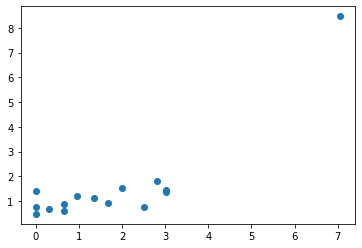

In [ ]:
plt.scatter(y_test[:15]*50,y_pred[:15]*50)

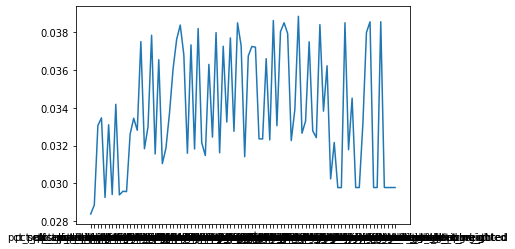

In [ ]:
plt.plot(features,errors)

In [ ]:
min(errors)

0.028383330309182903

In [ ]:
len(X.columns)

86

In [ ]:
y_new=state_data_dropped['pct_tested_and_positive']
X_new = state_data_dropped.drop(output_like_variables,axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new[['pct_cli_anosmia_ageusia', ]], y_new, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg = reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)
print ('done')
pct_sm =0
yp_l=list(y_pred)
yt_l=list(y_test)
for i in range(len(y_pred)):
  diff=abs(yp_l[i]-yt_l[i])
  pct= diff/(yt_l[i]+1)
  pct_sm+= pct
pct_sm/len(y_pred)

done


0.7655817535092425

In [ ]:
y_new.describe()

count    76790.000000
mean         1.530617
std          2.030489
min          0.000000
25%          0.000000
50%          0.865800
75%          2.319600
max         50.000000
Name: pct_tested_and_positive, dtype: float64

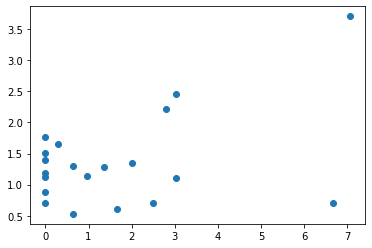

In [ ]:
plt.scatter(y_test[:20],y_pred[:20])

In [ ]:
rel_errors=[]
abs_errors=[]
did_not_train=[]
X_ori=state_data_dropped.copy()
for feat in features:
  print(feat)
  X_train, X_test, y_train, y_test = train_test_split(X_ori[[feat]], y_new, test_size=0.2, random_state=42)
  reg = DecisionTreeRegressor()
  try:
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
  except:
    did_not_train.append(feat)
    continue
  yp_l=list(y_pred)
  yt_l=list(y_test)
  pct_sm=0
  for i in range(len(y_pred)):
    diff=abs(yp_l[i]-yt_l[i])
    pct= diff/(yt_l[i]+1)
    pct_sm+= pct
  rel_error=pct_sm/len(y_pred)
  errors.append(rel_error)
  X_ori=X_ori.drop(feat,axis=1)

pct_self_anosmia_ageusia
pct_cli_anosmia_ageusia
pct_self_anosmia_ageusia_weighted
pct_cli_anosmia_ageusia_weighted
pct_hh_cli
pct_hh_cli_weighted
pct_hh_fever
pct_hh_fever_weighted
pct_cli
pct_ili
pct_self_fever
pct_cli_weighted
pct_self_fever_weighted
pct_ili_weighted
pct_hh_sore_throat_weighted
pct_hh_sore_throat
pct_avoid_contact_all_or_most_time
pct_avoid_contact_all_or_most_time_weighted
pct_hh_difficulty_breathing
pct_hh_difficulty_breathing_weighted
pct_self_persistent_pain_pressure_in_chest
pct_self_runny_nose
pct_worked_outside_home
pct_self_persistent_pain_pressure_in_chest_weighted
pct_self_runny_nose_weighted
pct_worked_outside_home_weighted
pct_self_nausea_vomiting_weighted
pct_hh_shortness_of_breath
pct_hh_shortness_of_breath_weighted
pct_self_nausea_vomiting
pct_self_sore_throat_weighted
pct_self_sore_throat
pct_self_difficulty_breathing
pct_self_difficulty_breathing_weighted
pct_asthma
pct_asthma_weighted
pct_self_shortness_of_breath
pct_self_shortness_of_breath_weight

In [ ]:
did_not_train

['mean_outside_hh_contact_in_social_gatherings_ct_weighted',
 'mean_outside_hh_contact_in_social_gatherings_ct',
 'mean_cmnty_cli_ct_weighted',
 'mean_cmnty_cli_ct',
 'mean_outside_hh_contact_shopping_ct_weighted',
 'mean_outside_hh_contact_at_work_ct_weighted',
 'mean_outside_hh_contact_shopping_ct',
 'mean_outside_hh_contact_at_work_ct']

In [ ]:
state_data_dropped['mean_outside_hh_contact_in_social_gatherings_ct_weighted'].is

2350       0.7446
2351       0.4869
2352       0.1173
2353       0.7922
2354       0.0000
           ...   
83248     12.9381
83249    959.4603
83250      8.9007
83251      5.1530
83398      4.1763
Name: mean_outside_hh_contact_in_social_gatherings_ct_weighted, Length: 76790, dtype: float64

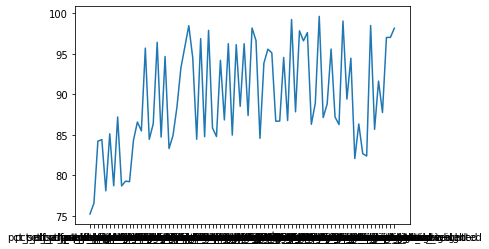

In [ ]:
tried=[f for f in features if f not in did_not_train]
error_pct=[100*e for e in errors]
plt.plot(tried,error_pct)


pct_self_anosmia_ageusia
pct_cli_anosmia_ageusia
pct_self_anosmia_ageusia_weighted
pct_cli_anosmia_ageusia_weighted
pct_hh_cli
pct_hh_cli_weighted
pct_hh_fever
pct_hh_fever_weighted
pct_cli
pct_ili
pct_self_fever
pct_cli_weighted
pct_self_fever_weighted
pct_ili_weighted
pct_hh_sore_throat_weighted
pct_hh_sore_throat
pct_avoid_contact_all_or_most_time
pct_avoid_contact_all_or_most_time_weighted
pct_hh_difficulty_breathing
pct_hh_difficulty_breathing_weighted
pct_self_persistent_pain_pressure_in_chest
pct_self_runny_nose
pct_worked_outside_home
pct_self_persistent_pain_pressure_in_chest_weighted
pct_self_runny_nose_weighted
pct_worked_outside_home_weighted
pct_self_nausea_vomiting_weighted
pct_hh_shortness_of_breath
pct_hh_shortness_of_breath_weighted
pct_self_nausea_vomiting
pct_self_sore_throat_weighted
pct_self_sore_throat
pct_self_difficulty_breathing
pct_self_difficulty_breathing_weighted
pct_asthma
pct_asthma_weighted
pct_self_shortness_of_breath
pct_self_shortness_of_breath_weight

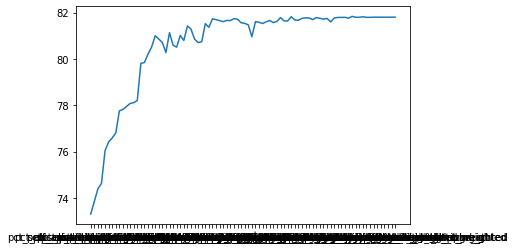

In [ ]:
errors=[]
did_not_train=[]
X_ori=state_data_dropped.copy()
for feat in features:
  print(feat)
  X_train, X_test, y_train, y_test = train_test_split(X_ori[[feat]], y_new, test_size=0.2, random_state=42)
  reg = LinearRegression()
  try:
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
  except:
    did_not_train.append(feat)
    continue
  yp_l=list(y_pred)
  yt_l=list(y_test)
  pct_sm=0
  for i in range(len(y_pred)):
    diff=abs(yp_l[i]-yt_l[i])
    pct= diff/(yt_l[i]+1)
    pct_sm+= pct
  rel_error=pct_sm/len(y_pred)
  errors.append(rel_error)
  X_ori=X_ori.drop(feat,axis=1)

tried=[f for f in features if f not in did_not_train]
error_pct=[100*e for e in errors]
plt.plot(tried,error_pct)


In [ ]:
rel_errors=[]
abs_errors=[]
for i in range(1,len(features)):
  X_ori=state_data_dropped.copy()
  X_train, X_test, y_train, y_test = train_test_split(X_ori[features[:i]], y_new, test_size=0.2, random_state=42)
  reg = LinearRegression()
  reg = reg.fit(X_train,y_train)
  y_pred= reg.predict(X_test)
  yp_l=list(y_pred)
  yt_l=list(y_test)
  pct_sm=0
  abs_sum = 0
  for i in range(len(y_pred)):
    diff=abs(yp_l[i]-yt_l[i])
    abs_sum += diff
    pct= diff/(yt_l[i]+1)
    pct_sm+= pct
  rel_error=pct_sm/len(y_pred)
  abs_error = abs_sum/len(y_pred)
  rel_errors.append(rel_error)
  abs_errors.append(abs_error)
  print(abs_error,rel_error)

1.3545683667912238 0.7330823396222861
1.352399802078422 0.731808840441377
1.3524241293215238 0.7318294365954872
1.3524517750503782 0.7317072685308171
1.3273915363557482 0.7147083720201163
1.3273335140132816 0.7146462695827724
1.3270315297865825 0.7144266154604921
1.3269492813720363 0.7143807480517549
1.3248038810060534 0.7128064610420553
1.3247191600265695 0.7128082042552997
1.3246837945649999 0.7127909751096431
1.324647804054067 0.7127799489444692
1.3245081853725966 0.7126643932896949
1.3242129323615575 0.7124583326500512
1.3221272794946382 0.7121163289444248
1.3213843439591966 0.7120105750399126
1.30028721885724 0.7026506163404383
1.2979481575240552 0.7011495095397635
1.2975381551308485 0.7008653109375081
1.2976665300776473 0.7011015275673408
1.2968910040973796 0.7007737077616791
1.2596220515864347 0.6807812768875434
1.2585435916976095 0.6796098482947445
1.2585488629240564 0.6796171862590035
1.2585355509750642 0.6796127145107311
1.2592026604427504 0.6814416117866731
1.258762046991767

In [ ]:
for i in range(2,75):
  X_ori=state_data_dropped.copy()
  X_train, X_test, y_train, y_test = train_test_split(X_ori[features[:i]], y_new, test_size=0.2, random_state=42)
  reg = GradientBoostingRegressor()
  reg = reg.fit(X_train,y_train)
  y_pred= reg.predict(X_test)
  yp_l=list(y_pred)
  yt_l=list(y_test)
  pct_sm=0
  for i in range(len(y_pred)):
    diff=abs(yp_l[i]-yt_l[i])
    pct= diff/(yt_l[i]+1)
    pct_sm+= pct
  rel_error=pct_sm/len(y_pred)
  print(rel_error)

0.7365841166013094
0.7333916539467176
0.733704500693195
0.7172155462847735
0.7163297339362976
0.7162116451048034
0.7155643081941547
0.7158834996629483
0.7157412779606418
0.7165791555744098
0.7165328215303032
0.7160860079492556
0.7161774328963979
0.7149699857455257
0.7149538104186577
0.6860949032772964
0.6864097915559909
0.6853481923300369
0.6859735966623306
0.6850224990234441
0.6597125489329229
0.6577873737047423
0.6582061349569592
0.6581326871942157
0.6585699584320219
0.6582244577338899
0.6586755037814566
0.6584390143422397
0.6578056775176508
0.6580481350878522
0.6587426593456176
0.6587637662793379
0.6591459985584595
0.6595604500650638
0.6596022574080354
0.660076664688809
0.6597539581705708
0.6556075243691617
0.6563348991991615
0.6568419739920093
0.6557417858036152
0.6566690339090676
0.6547714091071957
0.6553826266161507
0.6378471744281808
0.6382418485220671
0.6379760420036943
0.6390715069494365
0.6390994016085659
0.6382067979351397
0.6390653704880279
0.6394332271191536
0.638362831011

In [ ]:
3

In [ ]:
linear-> gradient 5%

In [ ]:
2->3.5
15000
1500-3000

In [ ]:
1.5%

In [ ]:
2**35


34359738368

In [ ]:
47
1)ideal subset
  a)bruteforce/medical kowledge
2)dl/complex/hpo
3)clustering

SyntaxError: ignored

In [ ]:
for i in range(2**35):
  if i %1000000 ==0:
    print(i)
  a=[i for i in range(35)]

Streaming output truncated to the last 5000 lines.
6777000000
6778000000
6779000000
6780000000
6781000000
6782000000
6783000000
6784000000
6785000000
6786000000
6787000000
6788000000
6789000000
6790000000
6791000000
6792000000
6793000000
6794000000
6795000000
6796000000
6797000000
6798000000
6799000000
6800000000
6801000000
6802000000
6803000000
6804000000
6805000000
6806000000
6807000000
6808000000
6809000000
6810000000
6811000000
6812000000
6813000000
6814000000
6815000000
6816000000
6817000000
6818000000
6819000000
6820000000
6821000000
6822000000
6823000000
6824000000
6825000000
6826000000
6827000000
6828000000
6829000000
6830000000
6831000000
6832000000
6833000000
6834000000
6835000000
6836000000
6837000000
6838000000
6839000000
6840000000
6841000000
6842000000
6843000000
6844000000
6845000000
6846000000
6847000000
6848000000
6849000000
6850000000
6851000000
6852000000
6853000000
6854000000
6855000000
6856000000
6857000000
6858000000
6859000000
6860000000
6861000000
6862000000
686

In [ ]:
age-gender-location